# Introduction to Bayesian statistics 

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/)  for the Vatican Observatory Summer School 2023, and it is available from [github](https://github.com/ivezic/IRB2023/blob/main/notebooks/IRBclass2.ipynb).

##### Highly recommended supplemental background reading:
- [Jake VanderPlas's workshop "Bayesian Astronomy"](https://github.com/jakevdp/BayesianAstronomy)
- [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction"](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)

- [Mario Juric: Frequentist vs. Bayesian Perspectives (LSSTC Data Science Fellowship Program Lecture)](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/tree/master/Session4/Day1)
- [Jake VanderPlas: ``Frequentism and Bayesianism: A Python-driven Primer"](https://arxiv.org/abs/1411.5018)
- [Hogg, Bovy and Lang: ``Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)


##### For those who want to dive deep:

- [D. Sivia and J. Skilling: ``Data Analysis: A Bayesian Tutorial''](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)
- [E.T. Jaynes: ``Probability Theory: The Logic of Science''](http://bayes.wustl.edu/etj/prob/book.pdf)
- [E.T. Jaynes: ``Confidence Intervals vs. Bayesian intervals''](http://bayes.wustl.edu/etj/articles/confidence.pdf)

<a id='toc'></a>

## This notebook includes:


[Bayes Rule extended to Bayesian Inference](#intro)

[The role of priors in Bayesian Inference](#prior)

[A simple parameter estimation example](#example) 

[Nuisance parameters and marginalization](#nuisance)

[More simple parameter estimation examples](#examples2)

[Bayesian model selection](#MSintro)

[Simple model selection examples](#MSexample)

[For overachievers: ABC and Hierarchical Bayes](#ABCandHB)

## Bayes Rule extended to Bayesian Inference <a id='intro'></a> 


![BayesSlide1](figures/bayes1.jpg)

## Bayes' Rule

We have that 
$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

Btw, this notation is often used, too ($p$ that both $A$ and $B$ will happen): 

$$p(A \cap B) \equiv p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

We can define the **marginal probability** as
$$p(x) = \int p(x,y)dy,$$
where marginal means essentially projecting on to one axis.

We can re-write this as
$$p(x) = \int p(x|y)p(y) dy$$


Since $$p(x|y)p(y) = p(y|x)p(x)$$ we can write that
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$
which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial -- it is just probability algebra!

What's more controversial is the **definition of probability**.

## Frequentist Probability
For frequentists, probability only has meaning in terms of **a limiting case of repeated measurements**.

That is, if I measure the photon flux $F$ from a given star (we'll assume for now that the star's flux does not vary with time), then measure it again, then again, and so on, each time I will get a slightly different answer due to the statistical error of my measuring device. In the limit of a large number of measurements, the frequency of any given value indicates the probability of measuring that value.

For frequentists **probabilities are fundamentally related to frequencies of events**. This means, for example, that **in a strict frequentist view, it is meaningless to talk about the probability of the true flux of the star: the true flux is (by definition) a single fixed value, and to talk about a frequency distribution for a fixed value is nonsense.**

## Bayesian Probability
For Bayesians, the concept of probability is extended to cover **degrees of certainty about statements**. You can think of it as an **extension of logic** to statements where there's uncertainty.

Say a Bayesian claims to measure the flux $F$ of a star with some probability $P(F)$: that probability can certainly be estimated from frequencies in the limit of a large number of repeated experiments, but this is not fundamental. The probability is a statement of my knowledge of what the measurement reasult will be.

For Bayesians, **probabilities are fundamentally related to our own knowledge about an event**. This means, for example, that **in a Bayesian view, we can meaningfully talk about the probability that the true flux of a star lies in a given range.**

That probability codifies our knowledge of the value based on prior information and/or available data.

## Why is this important?

Because it frees the Bayesian to ask a question such as:

* Given all I know (my measurements, the literature), what is the probability that a parameter $\theta$ is so-and-so?
* Given all I know (my measurements, the literature), what is the probability that a model is true?

And this is, intuitively, what a scientist wants to know.


![BayesSlide1](figures/bayes2.jpg)

### Recall Maximum Likelihood Estimation (MLE) applied to a Heteroscedastic Gaussian

For example, assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is 

$$L \equiv p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$



leading to (more convenient) log-likelihood

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_0} = \sum_{i=1}^N \frac{(x_i - \mu_o)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu_o}{\sigma_i^2},$$

yields a MLE solution of 
$$\mu_0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty (from the second derivative)
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)

In [2]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L
# first generate a sample of N points drawn from N(mu,sigma):
sampleSize=3
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(sampleSize) 
print(sample)

[1.09934283 0.97234714 1.12953771]


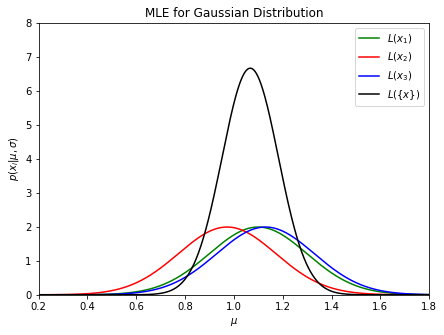

In [3]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L
# now compute likelihoods for each point using true mu 
muGrid = np.linspace(0,2,1000)
L1 = norm(sample[0], sigma).pdf(muGrid) 
L2 = norm(sample[1], sigma).pdf(muGrid) 
L3 = norm(sample[2], sigma).pdf(muGrid) 
L = L1 * L2 * L3
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

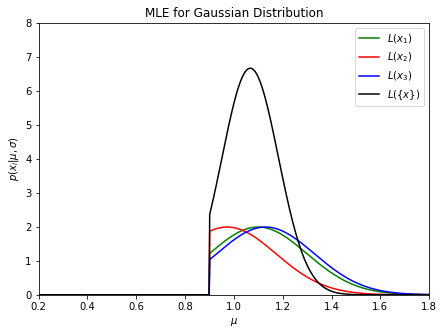

In [4]:
### What if I told you that mu>0.9?
muMin = 0.9
L1[muGrid < muMin] = 0
L2[muGrid < muMin] = 0
L3[muGrid < muMin] = 0
L = L1 * L2 * L3
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

### Brief History 

The Reverend Thomas Bayes (1702–1761) was a British amateur mathematician who wrote a manuscript 
on how to combine an initial belief with new data to arrive at an improved belief. The manuscript 
was published posthumously in 1763 and gave rise to the name Bayesian statistics.  

The initial "belief" can be (and often is) based on data. For example, consider only the first (N-1)
measurements, instead of all N measurements as in 
$$\mu_0^{N} = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$
which gives 
$$\mu_0^{N-1} = \frac{\sum_i^{N-1} (x_i/\sigma_i^2)}{\sum_i^{N-1} (1/\sigma_i^2)}.$$

Now, we can rewrite the expression for $\mu_0^{N}$ using the value of $\mu_0^{N-1}$, which 
we take to be our "intial belief", and the N-th measurement, $x_N$: 

$$\mu_0^{N} = \frac{(x_N/\sigma_N^2) + \sum_i^{N-1} (x_i/\sigma_i^2)}{\sum_i^{N-1} (1/\sigma_i^2)}
     * \frac{\sum_i^{N-1} (1/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}  $$
     
$$\mu_0^{N} = \frac{(x_N/\sigma_N^2)}{\sum_i^{N} (1/\sigma_i^2)} + \mu_0^{N-1} 
     * \frac{\sum_i^{N-1} (1/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}  $$

**This expression is a recipe for combining the prior belief, or knowledge ($\mu_0^{N-1}$), 
with the new measurement $x_N$. **

Given the inverse variance (squared uncertainty) $\sigma_\mu^{-2} = \sum_i^{N-1} (1/\sigma_i^2)$,
we also have 
$$\mu_0^{N} = \frac{(x_N/\sigma_N^2) + (\mu_0^{N-1}/\sigma_\mu^2)}{1/\sigma_N^2 + 1/\sigma_\mu^2}  $$

** The impact of each measurement is weighted by its inverse uncertainty squared. ** 

**A side note** This is an example of a conjugate prior. In special combinations 
of priors and likelihood functions, the posterior probability has the same functional 
form as the prior probability. These priors are called conjugate priors and represent 
a convenient way for generalizing computations. Here both prior and posterior pdfs
have the same functional form (Gaussian) because Gaussian prior and Gaussian likelihood
are conjugate prior (this is related to the fact that convolution of two Gaussians
gives a Gaussian).
 
The above expression greatly simplifies in case of homoscedastic errors 
($\sigma_\mu^{-2} = (N-1)/\sigma^2$): 

$$\mu_0^{N} = x_N * \frac{1}{N} + \mu_0^{N-1} * \frac{N-1}{N},  $$

which is a simple weighted sum of the prior value $\mu_0^{N-1}$ and the new value $x_N$. 


**Bayesian methodology allows us to derive analogous expressions in more complex and more general cases.**
  
 

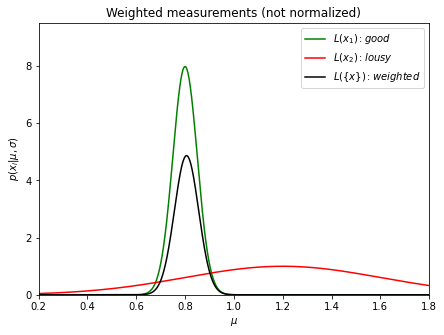

In [5]:
### What happens when we have one precise and one lousy measurement? 
L1 = norm(0.8, 0.05).pdf(muGrid) 
L2 = norm(1.2, 0.4).pdf(muGrid) 
L = L1 * L2 
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1): good$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2): lousy$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\}): weighted$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 9.5)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('Weighted measurements (not normalized)')
plt.legend()
plt.show() 
 

**If either of the two likelihoods (or one of the likelihood and prior pair) is 
the Dirac's $\delta$ function ("zero width"), the posterior is the same delta function.**
 

### More brief History 

The first renowned mathematician to popularize Bayesian methodology was Pierre Simon Laplace, 
who rediscovered (1774) and greatly clarified Bayes' principle. Laplace applied the principle 
to a variety of contemporary problems in astronomy, physics, population statistics, and even 
jurisprudence. One of the most famous results is his estimate of the mass of Saturn and its 
uncertainty, which remain consistent with the best measurements of today. 

**Laplace said: "I find that it is a bet of 11,000 against one that the error of this result is not 1/100th 
of its value".** Therefore, Laplace clearly interpreted measurements as giving a probability
statement about the mass of Saturn, although there is only one Saturn and its true mass is 
what it is, and it is not a random variable according to frequentist statistics.

Despite Laplace's fame, Bayesian analysis did not secure a permanent place in science.
Instead, classical frequentist statistics was adopted as the norm (this could be at least
in part due to the practical difficulties of performing full Bayesian calculations without the
aid of computers). Much of Laplace's Bayesian analysis was ignored until the early twentieth
century when Harold Jeffreys reinterpreted Laplace's work with much clarity. 
Yet, even Jeffreys' work was not fully comprehended until around 1960, when it took off thanks
to vocal proponents such as de Finetti, Savage, Wald, and Jaynes, and of course, the advent of
computing technology. 
 

### An example of a difficulty with the MLE 

Imagine you arrive at a bus stop, and observe that the bus arrives $t$ minutes later 
(it is assumed that you had no knowledge about the bus schedule). What is the mean time 
between two successive buses, $\tau$, if the buses keep a regular schedule? 

It is easy to derive an intuitive answer. The wait time is distributed uniformly in the interval $0 \le t \le \tau$, and on average you would wait for $t=\tau/2$ minutes.  Rearranging this gives $\tau = 2t$, which agrees with intuition.

What does the maximum likelihood approach give? 

The probability that you will wait $t$ 
minutes (the likelihood of data) is given by the uniform distribution (every $t$ is equally likely)
$$ p(t\,|\,\tau) =  1/\tau, $$
if $0 \le t \le \tau$ and $p(t|\tau)=0$ otherwise.


Because we only observe a single point, the data likelihood is simply equal to this probability. 
The maximum likelihood, then, corresponds to the smallest possible $\tau$ such that $t \le \tau$: 
this is satisfied by $\tau = t$ and not $\tau=2t$ as we expected!!

Computing the expectation value or the median for $\tau$ does not help either because
the resulting integrals diverge. These puzzling results are resolved by the use of appropriate prior
information, as will be discussed in a moment. We shall see several other examples later where the
addition of extra information changes the results we would get from the maximum likelihood
approach.

Let's first introduce basic steps in Bayesian analysis, then use it to resolve
the "bus MLE puzzle", and then we'll discsus nuisance parameters in more details. 
 

## Bayesian Statistical Inference

Up to now we have been computing the **likelihood** $p(D\,|\,M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall that Bayes' Rule is:
$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$
where $D$ is for data and $M$ is for model. Or in words, 
$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$
where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 
$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I),$$
it will still appear in the term $p(\theta\,|\,M,I)$.

Note that it is often the case that $p(D\,|\,I)$ is not evaluated explictly since the posterior probability 
can be (re)normalized. 

**The Bayesian Statistical Inference process** is then
* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* chose a prior$^1$, $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
* determine the posterior pdf, $p(M,\theta \,|\,D,I)$
* search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ 
* quantify the uncertainty of the model parameter estimates
 
$^1$: Note that $p(\theta, M\,|\,I) = p(\theta\,|\,M, I)\, p(M\,|\,I)$.  

Going back to our bus arrival problem, our unknown model parameter is $\tau$ and data is $t$, so that 
$$p(\tau\,|\,t,I) = p(t\,|\,\tau) \, p(\tau\,|\,I).$$

Before applying this expression, we need to discuss how to choose priors, here $p(\tau\,|\,I)$.

## Bayesian Priors <a id='priors'></a>
[Go to top](#toc)



Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

Detailed discussion can be found in Section 5.2 in the textbook. There are three
main principles used to choose a prior: 


#### The Principle of Indifference

Essentially this means adopting a uniform prior, though you have to be a bit careful.  Saying that an asteroid is equally likely to hit anywhere on the Earth is not the same as saying that all latitudes of impact are equally likely.  

Assuming $1/6$ for a six-side die, or 1/2 for heads and tails of a fair coin, would be an example of indifference.

#### The Principle of Invariance (or Consistency)

This applies to location and scale invariance.  

**Location invariance** suggests a uniform prior, within the accepted bounds: $p(\theta|I) \propto 1/(\theta_{max}-\theta_{min})$ for $\theta_{min} \le \theta \le \theta_{max}$. 

**Scale invariance** gives us priors that look like $p(\theta|I) \propto 1/\theta$, which implies a uniform
prior for ln($\theta$). 

#### The Principle of Maximum Entropy

We will not discuss it here - for more details, see Section 5.2.2 in the textbook.
 
It is often true that Bayesian analysis and traditional MLE are essentially equivalent.  
However, in some cases, considering the priors can have significant consequences, as
we will see later. 

We will skip examples of very steep priors and their consequences called in astronomy
literature **Eddington-Malmquist** and **Lutz-Kelker** biases (see Chapter 5 in the textbook
if you are interested). 

Now, let's go back to the bus arrival problem. 

## A simple parameter estimation example <a id='example'></a>
[Go to top](#toc)

In our **bus arrival problem**, $\tau$ is unknown model parameter and data (datum) is $t$. The
posterior pdf for $\tau$ is (we ignore normalization): 
$$p(\tau\,|\,t, I) \propto p(t\,|\,\tau,I) \, p(\tau\,|\,I).$$

The likelihood of data is given by the uniform distribution (every $t$ is equally likely, with 
$0 \le t \le \tau$):
$$ p(t\,|\,\tau,I) =  1/\tau. $$  

Following the Principle of Invariance, we assign the prior
$$ p(\tau\,|\,I) = 1/ \tau.$$

Note: the two pdfs look the same but this is essentially a coincidence. 

So, we have 
    $$p(\tau \,|\, t,I) \propto  1/ \tau^2,$$
for $\tau > t$ and 0 otherwise. We use normalization constraint 
$$ \int_t^\infty p(\tau\,|\,I)d\tau = \int_t^\infty C/\tau^2 d\tau \equiv 1,$$
to get $C=t$ (the divergent integral over $\tau$ encountered in the maximum likelihood 
analysis is mitigated here by the extra $\tau$ term from the prior).

The properly normalized posterior pdf for $\tau$ (valid for $\tau > t$) is thus 
$$   p(\tau \,|\, t,I) = \frac{t}{\tau^2}.$$
  
  
The median $\tau$ given by the posterior $p(\tau \,|\, t,I)$ is now equal to $2t$, 
in agreement with our expectations. 

An interesting side result is that the p% quantiles 
are equal to ($1-t/\tau$); for example, the 95% confidence region for $\tau$, 
or **the credible region**, spans $1.03 t < \tau < 40 t$. If we waited for a bus 
for just 1 minute, then, adopting the usual 95% confidence region, we cannot reject the 
possibility that $\tau$ is as large as 40 minutes. 

Equivalently, if we waited for a 
bus for 1 minute, we can paraphrase Laplace and say that “it is a bet of 20 against 1 
that the bus will arrive in the interval between 0.03 minutes and 39 minutes from now.”





## Nuisance parameters and marginalization: heteroscedastic Gaussian as an example <a id='nuisance'></a>
[Go to top](#toc)


Consider the case of measuring a rod.  We want to know the posterior pdf for the length of the rod, $p(M,\theta|D,I) \equiv p(\mu|\{x_i\},\{\sigma_i\},I)$.

For the likelihood we have
$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

**In the Bayesian case, we also need a prior.**  We'll adopt a uniform distribution given by
$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$
where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then
$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is exactly the same as we saw before, except that the value of the constant is different.  Since the constant doesn't come into play, we get the same result as before:
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$
with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$
 
 We get the same result because we used a flat prior. If the case were homoscedastic instead of heteroscedastic, we obviously would get the result from our first example.



### Nuisance parameters and marginalization: heteroscedastic Gaussian as an example


Now let's consider the case where **$\sigma$ is not known**, but rather it needs to be determined from the data, too.

In this case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather $p(\mu,\sigma|\{x_i\},I)$.

As before we have
$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
except that now $\sigma$ is uknown.

Our Bayesian prior is now 2D instead of 1D and we'll adopt 
$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have
$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$
where
$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Right now that has $x_i$ in it, which isn't that helpful, but since we are assuming a Gaussian distribution, we can take advantage of the fact that the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterized the distribution.  So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details (see textbook $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$. A side note: these three data-based values 
fully encapsulate our dataset and are called *sufficient statistics*.

Load and execute the next cell to visualize the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$.  Remember to change `usetex=True` to `usetex=False` if you have trouble with the plotting.  Try changing the values of $(N,\overline{x},V)$. 
 

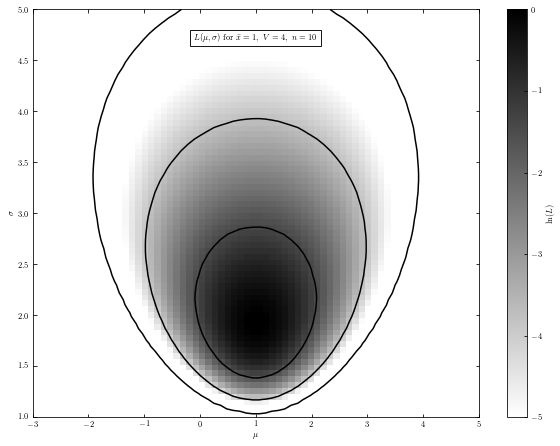

In [6]:
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()

### Nuisance parameters and marginalization: heteroscedastic Gaussian as an example
 
The plot from the previous cell is described by 
$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$
 
 
**A side note:** Had we assumed a uniform distribution of $\sigma$, instead of ln($\sigma$), then the factor multiplying ln($\sigma$) would change from (N + 1) to N. This is related to the fact that the expression for
the standard deviation has a term (N-1) rather than N.

Assume a case where $\sigma$ is not crucially important to what we are after, e.g. it may 
simply represent how good our measuring apparatus is - what we might get a Nobel prize for 
is $\mu$. Therefore, what we want is $p(\mu|\{x_i\},I)$, rather than $p(\mu,\sigma|\{x_i\},I)$.
We can get the former from the latter by the **marginalization over $\sigma$**, which means
integration of $p(\mu,\sigma|\{x_i\},I)$ over $\sigma$: 

$$ p(\mu\,|\,\{x_i\},I) = \int_0^\infty p(\mu,\sigma|\{x_i\},I) d\sigma$$
and thus (using the substitution $t$ = 1/$\sigma$ and integration by parts)

$$ p(\mu\,|\,\{x_i\},I) \propto \left(1 + \frac{(\overline{x}-\mu)^2}{V} \right)^{-N/2}. $$

It is easy to show that this result corresponds to Student’s t distribution (google it!) with 
k = N-1 degrees of freedom for the variable $t = (x-\mu)/(s/\sqrt{N})$, where $s$ is the sample 
standard deviation. Student’s t distribution is symmetric and bell shaped, but with heavier 
tails than for a Gaussian distribution.  

**Hold on!** This is not a Gaussian distribution promised by the Central Limit Theorem!!! 

That's fine! The CLT promised a Gaussian only for large N. Indeed, the above expression
(Student's t distribution) morphs into a Gaussian for large N - let's check!



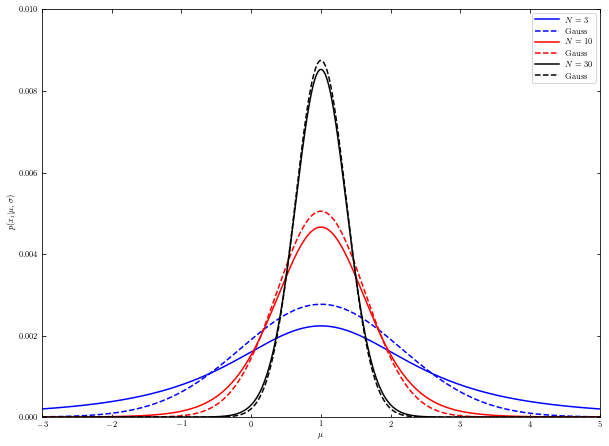

In [7]:
### let's see how Student's t distribution morphs into Gaussian distribution
# let's first choose mean x and variance as in the previous example
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

# and now let's generate p(mu) for N=3, 10 and 20
def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
#
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)
N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)
N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)
 
## plot
fig, ax = plt.subplots(figsize=(10, 7.5))
plt.plot(mu, pmu1, ls='-', c='blue', label=r'$N=3$')
plt.plot(mu, G1norm, ls='--', c='blue', label=r'Gauss')
plt.plot(mu, pmu2, ls='-', c='red', label=r'$N=10$')
plt.plot(mu, G2norm, ls='--', c='red', label=r'Gauss')
plt.plot(mu, pmu3, ls='-', c='black', label=r'$N=30$')
plt.plot(mu, G3norm, ls='--', c='black', label=r'Gauss')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show() 

[Go to top](#toc)

### Marginal distributions $p(\mu)$ and $p(\sigma)$

The top panels of the figure below (textbook figure 5.5, for the code see 
[astroML website](http://www.astroml.org/book_figures/chapter5/fig_posterior_gaussian.html)) show marginal distributions $p(\mu)$ and $p(\sigma)$.  The solid line is 
analytic Bayesian result with uninformative prior and the dotted line is the result for a uniform prior (note 
that there is not that much difference).  The dashed line is the MLE result, which is quite different.  The bottom panels show the cumulative distributions.

![Ivezic, Figure 5.5](figures/fig_posterior_gaussian_1.png)
 

[Go to top](#toc)

## More simple parameter estimation examples <a id='examples2'></a>
[Go to top](#toc)

### Parameter estimation for the binomial distribution

* We already talked about this example in Lecture 2!

If you flip a coin $N$ times and get $k$ tails, the probability of tails, $b$,
can be estimated as $b_o=k/N$. 
For large N, the uncertainty of $b_o$ is approximately Gaussian and given by 
$$ \sigma_b = \left[\frac{b_o \, (1-b_o)}{N}\right]^{1/2}. $$

For small N, we can use Bayesian approach to compute posterior pdf $p(b)$, as follows.

Here the data set $\{x_i\}$ is discrete: all outcomes are either 0 (heads) or 1 (tails, which we will consider “success”). An astronomical analog might be the computation of the fraction of galaxies which show evidence for a black hole in their center. 

Given a model parametrized by the probability of success (i.e. tails) $b$, the likelihood that the data set 
contains k outcomes equal to 1 is given by 
  $$    p(k\,|\,b, N) = \frac{N!}{k! \, (N-k)!} \, b^k \, (1-b)^{N-k} $$

Assuming that the prior for $b$ is flat in the range 0-1, the posterior pdf for $b$ is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$

where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

For a concrete numerical example, let us assume that we studied $N = 10$ galaxies and found 
a black hole in $k = 4$ of them. Our best estimate for the fraction of galaxies with black 
holes is $b_o = k/N = 0.4$. An interesting question is, “What is the probability that, say, 
$b < 0.1$?”. For example, your colleague’s theory placed *an upper limit of 10%* for the fraction 
of galaxies with black holes and you want to test this theory using classical framework 
“Can it be rejected at a confidence level $\alpha = 0.01$?”.

In other words, if the probability of $b < 0.1$, given data, is smaller than 0.01 (that is,
the probability of $b > 0.1$ is larger than 0.99) we reject the theory (in classical statistical 
hypothesis testing), and if the probability of $b < 0.1$ is larger than 0.01 we cannot reject
the theory (which does not prove that the theory is correct!). We will address Bayesian
hypothesis testing (i.e. model selection) further below. 

In [8]:
import numpy as np
from scipy.stats import norm, binom
from matplotlib import pyplot as plt

In [9]:
# modeled after code by Jake VanderPlas:
# https://www.astroml.org/book_figures/chapter5/fig_posterior_binomial.html
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)

def doBinomial(n=10, k=4, CDFmin=1E-3):
    
    import numpy as np
    from scipy.stats import norm, binom
    from matplotlib import pyplot as plt

    #------------------------------------------------------------
    # Plot posterior as a function of b
    # n = 10  # number of points
    # k = 4  # number of successes from n draws

    b = np.linspace(0, 1, 100)
    db = b[1] - b[0]

    # compute the probability p(b) (eqn. 5.70)
    p_b = b ** k * (1 - b) ** (n - k)
    p_b /= p_b.sum()
    p_b /= db
    cuml_p_b = p_b.cumsum()
    cuml_p_b /= cuml_p_b[-1]

    # compute the gaussian approximation (eqn. 5.71)
    b0 = k * 1. / n
    sigb = np.sqrt(b0*(1-b0)/n)
    p_g = norm(b0, sigb).pdf(b)
    cuml_p_g = p_g.cumsum()
    cuml_p_g /= cuml_p_g[-1]

    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(9, 5))
    fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)

    ax = fig.add_subplot(121)
    ax.plot(b, p_b, '-b')
    ax.plot(b, p_g, '--r')
    expVal = k/n 
    ax.plot([expVal, expVal], [1E-6, 2000], ':k')

    ax.set_ylim(-0.05, np.max(p_b)*1.1)

    ax.set_xlabel('$b$')
    ax.set_ylabel('$p(b|n,k,I)$')
    plt.title('blue: exact; red: Gaussian approximation')

    ax = fig.add_subplot(122, yscale='log')
    ax.plot(b, cuml_p_b, '-b')
    ax.plot(b, cuml_p_g, '--r')
    ax.plot([expVal, expVal], [1E-3, 2], ':k')
    ax.plot([-0.02, 1.02], [0.5, 0.5], ':k')

    titleStr = 'cumulative pdf'
    plt.title(titleStr)

    ax.set_xlabel('$b$')
    ax.set_ylabel('$P(<b|n,k,I)$')
    ax.set_ylim(CDFmin, 2)
    
    print('n =', n, 'k =', k, ': CDF(b=0.1)=', np.interp(0.1, b, cuml_p_b))

    plt.show()

n = 10 k = 4 : CDF(b=0.1)= 0.003425489725149792


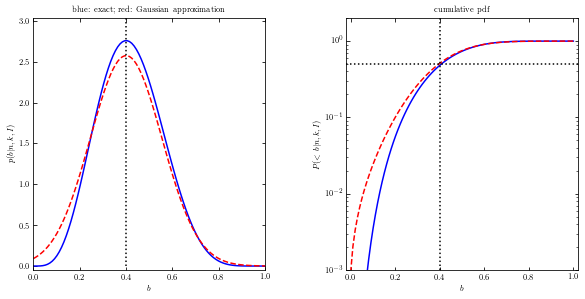

In [10]:
doBinomial(10, 4)

### Parameter estimation for the binomial distribution

For $N=10$ and $k=4$: $p(b < 0.1\,|\,k = 4, N = 10) = 0.0034$ and the theory is rejected
at a confidence level $\alpha = 0.01$. 

However, using Gaussian approximation we get 
$p(b < 0.1) = 0.03$ and thus at a confidence level $\alpha = 0.01$ the theory is **not** rejected! 

**Conclusion**: when $N$ is not large, or $b_o$ is close to 0 or 1, one should avoid using the 
Gaussian approximation when estimating the credible region (or the confidence interval) for $b$.

An interesting numerical experiment is to observe how $p(b \,|\, k, N )$ evolves with the number
and outcome of coin flips...

Here, experiment with the above code by changing $k$ and $N$ and observing the bahavior of $p(b)$, and its (dis)agreement with the Gaussian approximation. 

n = 100 k = 40 : CDF(b=0.1)= 3.27307714807364e-15


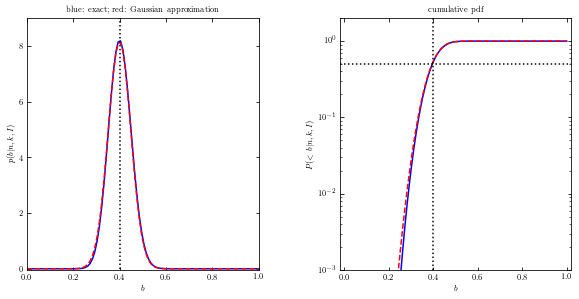

In [11]:
doBinomial(100, 40)

## It is interesting to see how the posterior changes with each data point:

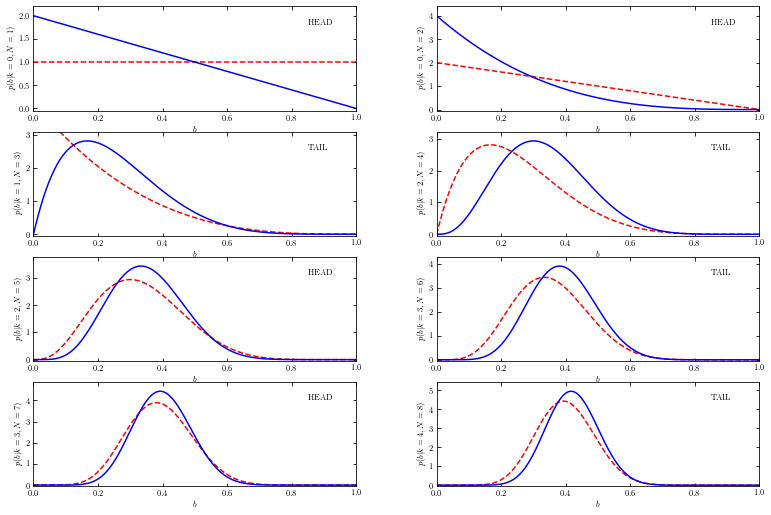

p(b<0.25):  0.011894078069101604


In [12]:
# results for my coin (0:head, 1: tail)
flipData = [0, 0, 1, 1, 0, 1, 0, 1]

# plotting setup 
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.25, bottom=0.18)
 
# b grid for computing p(b) 
b = np.linspace(0,1,1000)
db = b[1]-b[0]
# prior 
p_b = 1.0 + 0*b   # flat prior
# p_b = norm(0.5, 0.1).pdf(b)   Gaussian prior

# loop over data
for i in range(1,9):
    ax = fig.add_subplot(int('52' + str(i)))
    # show p_b before this data point is added
    ax.plot(b, p_b, '--r')
    # now get new p_b
    N = i 
    k = flipData[0:i].count(1)
    p_b = p_b * (b ** k * (1 - b) ** (N - k))
    p_b /= p_b.sum()
    p_b /= db
    # p_b after this data point is added
    label=' z'
    ax.plot(b, p_b, '-b', label=label)
    ax.set_xlabel('$b$')
    s = '$p(b|k=%i' % k
    s = s + ', N=%i)$' % N
    if (flipData[i-1] == 0): 
        ax.text(0.85, np.max(p_b)*0.9,'HEAD')
    else:
        ax.text(0.85, np.max(p_b)*0.9,'TAIL')
    ax.set_ylabel(s)
    ax.set_ylim(-0.05, np.max(p_b)*1.1)
    
plt.show()

cuml_p_b = p_b.cumsum()
cuml_p_b /= cuml_p_b[-1]
print('p(b<0.25): ', np.interp(0.25, b, cuml_p_b)) 




# Bayesian model selection <a id='MSintro'></a>
[Go to top](#toc)

## Bayesian Statistical Inference

In Bayesian inference, we evaluate the **posterior probability** by using
** data likelihood** and **prior** information: 
 
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|M,\,I)},$$

The prior can be expanded as 
$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I).$$
 
It is often the case that **the evidence** $p(D\,|M,\,I)$ is not evaluated explictly since the posterior probability 
can be (re)normalized. 

Using the law of total probability, recall
$$p(A) = \sum_ip(A|B_i)p(B_i),$$
we can evaluate the evidence as 
$$E(M) = p(D\,|M,\,I) = \int p(D\,|\,M, \theta, I) \, p(\theta\,|M,\,I) \, d\theta$$

**The Bayesian Statistical Inference process** is then
* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* chose a prior $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
* determine the posterior pdf, $p(M,\theta \,|\,D,I)$
* search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ 
* quantify the uncertainty of the model parameter estimates (credible region)
 
 
### Bayesian Model Comparison

To determine which model is better we compute the ratio of the posterior probabilities or the **odds ratio** for two models as
$$O_{21} \equiv \frac{p(M_2|D,I)}{p(M_1|D,I)}.$$

The posterior probability that the model $M$ is correct given data $D$, $p(M|D,I)$,  is given by the Bayes rule,
$$p(M|D,I) = \frac{p(D|M,I)p(M|I)}{p(D|I)},$$
and the odds ratio can ignore $p(D|I)$ since it will be the same for both models. 

We get 
$$O_{21} = \frac{p(D\,|\,M_2,I)\,p(M_2\,|\,I)}{p(D\,|\,M_1,I)\,p(M_1\,|\,I)} \equiv B_{21} \, \frac{p(M_2\,|\,I)}{p(M_1\,|\,I)},$$
where $B_{21}$ is called the **Bayes factor**. 

The Bayes factor compares how well the models fit the data: it is a ratio of data likelihoods averaged over 
all allowed values of the model parameters and computed as (again, using the law of total probability)
$$B_{21} = \frac{\int p(D\,|\,M_2, \theta, I) \, p(\theta\,|\,M_2, I) \, d\theta}{\int p(D\,|\,M_1, \theta, I) \, p(\theta\,|\,M_1, I) \, d\theta}. $$
 
In other words, the Bayes factor is the ratio of **the global likelihoods for models $M_1$ and $M_2$**, 
where the global likelihood, or evidence, is a weighted average of the likelihood function, with the 
prior for model parameters acting as the weighting function.

N.B. To get the best-fit model parameters, we take a derivative of the product of the likelihood function
and priors with respect to model parameters (and equate it to 0), while to get the global likelihood we integrate that product (that is, the posterior) over the model parameter space.
 
**How do we interpret the values of the odds ratio, $O_{21}$, in practice?**

Jeffreys proposed a five-step scale for 
interpreting the odds ratio, where $O_{21} > 10$ represents “strong” evidence in favor of $M_2$ ($M_2$ 
is ten times more probable than $M_1$; analogously $O_{21} < 0.1$ is “strong” evidence in favor of $M_1$), 
and $O_{21} > 100$ is “decisive” evidence ($M_2$ is one hundred times more probable than $M_1$). 
When $O_{21} < 3$, the evidence is “not worth more than a bare mention.”

### Approximate Bayesian Model Comparison

The data likelihood, required to compute the models odds ratio, and the commonly 
used $\chi^2$ goodness-of-fit parameter are related. By introducting a few 
assumptions and approximations, the computations of the odds ratio can be
greatly simplified and expressed as the sum of $\chi^2$ and a term that penalizes
models for their parameters (when models achieve similar values of $\chi^2$,
the one with the smallest number of free parameters wins). 
 
We consider a one dimensional case with unknown parameter $\mu$ and
start with an approximate computation of the evidence $E(M)$,
$$ E(M) = \int p(\{x_i\}, \,|\,M, \mu, I) \, p(\mu \,|\,M, I) \, d \mu .$$

Our first assumption is that the prior is uniform 
$$  p(\mu\,|\, M, I) = \frac{1}{\Delta} \,\,\,\,\,\, {\rm for} \,\,\, -\frac{\Delta}{2} < \mu < \frac{\Delta}{2}$$
and 0 otherwise. 

The second assumption is that the data likelihood can
be approximated as a Gaussian around its maximum at $\mu=\mu_0$
$$ p(\{x_i\} \,|\,M, \mu, I) \approx L(\mu_0) \, \exp \left( - \frac{(\mu - \mu_0)^2}{2 \sigma_\mu^2} \right). $$

These assumptions lead to 
$$ E(M) \approx \frac{L(\mu_0)}{\Delta} \, \int_{-\Delta/2}^{\Delta/2} \exp \left( - \frac{(\mu - \mu_0)^2}{2 \sigma_\mu^2}\right) d\mu, $$
and with an additional assumption $\sigma_\mu \ll \Delta$ (data overcomes
the prior), we get
$$ E(M) \approx \frac{\sigma_\mu}{\Delta} \, L(\mu_0) \, \sqrt{2\pi}. $$

Note that $E(M) \ll L(\mu_0)$, because $\sigma_\mu \ll \Delta$. In multi-dimensional
case, each model parameter constrained by the model carries a similar 
multiplicative penalty, proportional to $\sigma_\mu/\Delta$, when computing the 
Bayes factor. If a parameter, or a degenerate parameter combination, is unconstrained 
by the data (i.e., $\sigma_\mu \approx \Delta$), there is no penalty.  
The odds ratio can justify an additional model parameter **only if this penalty is offset** by either 
an increase of the maximum value of the data likelihood, $L(\mu_0$), or by the ratio 
of prior model probabilities, $p(M_2|I)/p(M_1|I)$. If both of these quantities are 
similar for the two models, the one with fewer parameters typically wins.

If a model is well constrained by the data, for each of $k$ constrained
parameters, $\sigma_\mu \propto 1/\sqrt{N}$, where $N$ is the number of data 
points. Therefore,
$$ E(M) \propto L(\mu_0) \, \left(\sqrt{N}\right)^k. $$
 
In order to establish connection with $\chi^2$ via $L(\mu_0) =
\exp\left(-\frac{\chi^2}{2}\right)$, we define for a model the **Bayesian information 
criterion (BIC)** as $BIC \equiv -2\ln{E(M)}$, and finally obtain  
$${\rm BIC} = -2 \ln [L_0(M)] + k \ln N.$$ 
The 1st term on the RHS is equal to model's $\chi^2$ (under the assumption 
of normality; note that this is *not* $\chi^2$ per degree of freedom!) and 
the 2nd term on the RHS penalizes complex models relative to simple ones.

In summary, when multiple models are considered, their BIC values, computed as
$${\rm BIC} = \chi^2 + k \ln N,$$ 
where $N$ is the number of data points and $k$ is the number of constrained
model parameters, are compared and the model with the smallest BIC value wins.   
 
**N.B.** BIC is an approximation and might not be valid if the underlying 
assumptions (data ovecoming prior and Gaussian likelihood) are not met! In general, it is better to compute the odds ratio when computationally feasible.

   
###  How do we interpret BIC? 

Given the relationship between the BIC and $O_{21},$ 
$$    \Delta BIC \equiv BIC_2 - BIC_1 = -2\,\ln(O_{21}) $$ 
we have that $O_{21}=10$ corresponds to $\Delta BIC= -4.6$ and $O_{21}=100$ corresponds to $\Delta BIC = -9.2$.
For completeness, $|\Delta BIC|<2$ is “not worth more than a bare mention.”

### Bayesian Hypothesis Testing

In *hypothesis testing* we are essentially comparing a model, $M_1$, to its complement.  That is $p(M_1) + p(M_2) = 1$.  

If we take $M_1$ to be the "null" (default) hypothesis (which is generally that, for example, a correlation does *not* exist), then we are asking whether or not the data reject the null hypothesis.

In classical hypothesis testing we can ask whether or not a single model provides a good description of the data.  

** In Bayesian hypothesis testing, we must have an alternative comparison model! **


Let's draw sample from a Cauchy distribution and perform Bayesian Model Comparison for 
Cauchy and Gaussian models. 




## Simple model selection examples <a id='MSexample'></a>
[Go to top](#toc)

## Example 1:  Gaussian vs. Cauchy model 

#### Let's draw sample from a Cauchy distribution and perform Bayesian Model Comparison for Cauchy and Gaussian models.

Results for first 10 points:
  L(M = Cauchy) = 1.18e-12 +/- 5.39e-16
  L(M = Gauss)  = 8.09e-13 +/- 7.45e-16
  O_{CG} = 1.45 +/- 0.00134


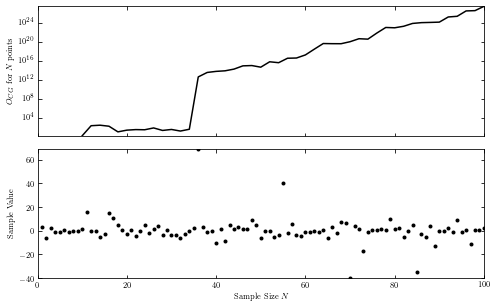

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm
from scipy import integrate

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def logL_cauchy(xi, gamma, mu,
                mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - n * np.log(np.pi)
            + (n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


def logL_gaussian(xi, sigma, mu,
                  mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.57: gaussian likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - 0.5 * n * np.log(2 * np.pi)
            - (n + 1) * np.log(sigma)
            - np.sum(0.5 * ((xi - mu) / sigma) ** 2, 0))


def calculate_odds_ratio(xi, epsrel=1E-8, epsabs=1E-15):
    """
    Compute the odds ratio by perfoming a double integral
    over the likelihood space.
    """
    gauss_Ifunc = lambda mu, sigma: np.exp(logL_gaussian(xi, mu, sigma))
    cauchy_Ifunc = lambda mu, gamma: np.exp(logL_cauchy(xi, mu, gamma))

    I_gauss, err_gauss = integrate.dblquad(gauss_Ifunc, -np.inf, np.inf,
                                           lambda x: 0, lambda x: np.inf,
                                           epsabs=epsabs, epsrel=epsrel)
    I_cauchy, err_cauchy = integrate.dblquad(cauchy_Ifunc, -np.inf, np.inf,
                                             lambda x: 0, lambda x: np.inf,
                                             epsabs=epsabs, epsrel=epsrel)

    if I_gauss == 0:
        O_CG = np.inf
        err_O_CG = np.inf
    else:
        O_CG = I_cauchy / I_gauss
        err_O_CG = O_CG * np.sqrt((err_gauss / I_gauss) ** 2)

    return (I_gauss, err_gauss), (I_cauchy, err_cauchy), (O_CG, err_O_CG)


#------------------------------------------------------------
# Draw points from a Cauchy distribution
np.random.seed(44)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)

#------------------------------------------------------------
# compute the odds ratio for the first 10 points
((I_gauss, err_gauss),
 (I_cauchy, err_cauchy),
 (O_CG, err_O_CG)) = calculate_odds_ratio(xi[:10])

print("Results for first 10 points:")
print("  L(M = Cauchy) = %.2e +/- %.2e" % (I_cauchy, err_cauchy))
print("  L(M = Gauss)  = %.2e +/- %.2e" % (I_gauss, err_gauss))
print("  O_{CG} = %.3g +/- %.3g" % (O_CG, err_O_CG))

#------------------------------------------------------------
# calculate the results as a function of number of points
Nrange = np.arange(10, 101, 2)
Odds = np.zeros(Nrange.shape)
for i, N in enumerate(Nrange):
    res = calculate_odds_ratio(xi[:N])
    Odds[i] = res[2][0]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.1)

ax1 = fig.add_subplot(211, yscale='log')
ax1.plot(Nrange, Odds, '-k')
ax1.set_ylabel(r'$O_{CG}$ for $N$ points')
ax1.set_xlim(0, 100)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_locator(plt.LogLocator(base=10000.0))

ax2 = fig.add_subplot(212)
ax2.scatter(np.arange(1, len(xi) + 1), xi, lw=0, s=16, c='k')
ax2.set_xlim(0, 100)
ax2.set_xlabel('Sample Size $N$')
ax2.set_ylabel('Sample Value')

plt.show() 

## Example 2:  Coin Flip 

Let's look at an example we already discussed: the coin flip. Let's assume we have
N draws and k are success (say, heads). 

We will compare two hypotheses; 

**M1**: the coin has a known heads probability $b_\ast$ (say, a fair coin with $b_\ast=0.5$), and 

**M2**: the heads probability $b$ is unknown, with a uniform prior in the range 0–1. 
Note that the prior for model M1 is a delta function, $\delta(b-b_\ast)$. 

Given a model parametrized by the probability of success $b$, the likelihood that the data set 
contains k outcomes equal to 1 is given by 
  $$    p(k\,|\,b, N) = \frac{N!}{k! \, (N-k)!} \, b^k \, (1-b)^{N-k} $$

For model M2 the prior for $b$ is flat in the range 0-1 and the product of the 
data likelihood and prior is same as above. However, for model M1 the prior is a 
delta function $\delta(b-b_\ast)$ and we get for the product of the 
data likelihood and prior  
$$    p(k\,|\,b_\ast, N, M1)\,p(b|M1, I) = \frac{N!}{k! \, (N-k)!} \, b_\ast^k \, (1-b_\ast)^{N-k}. $$

Consequently, the odds ratio is given by 
$$ O_{21} = \int_0^1 \left(\frac{b}{b_\ast}\right)^k \left(\frac{1-b}{1-b_\ast}\right)^{N-k} db, $$
as illustrated in the following figure. 

 
![OddsRatio](figures/odds.tiff)

This figure (from the textbook) illustrates the behavior of $O_{21}$ as a function of $k$
for two different values of N and for two different values of $b_\ast$: $b_\ast = 0.5$ 
(M1: the coin is fair) and $b_\ast = 0.1$. As the figure shows, the ability to distinguish 
the two hypothesis **improves** with the sample size. For example, when $b_\ast= 0.5$ and 
k/N = 0.1, the odds ratio in favor of M2 increases from about 9 for N = 10 to about 
263 for N = 20. When k = $b_\ast N$, the odds ratio is 0.37 for N = 10 and 0.27 for N = 20. 
In other words, **the simpler model is favored by the data**, and the support strengthens 
with the sample size. 

It is easy to show by integration of the above equation for $O_{21}$ that 
$O_{21}= \sqrt{\pi/(2N)}$ when k = $b_\ast N$ and $b_\ast = 0.5$. For example, to build strong 
evidence that a coin is fair, $O_{21} < 0.1$, it takes as many as N $>$ 157 tosses. With 
N = 10,000, the heads probability of a fair coin is measured with a precision of 1% and
the corresponding odds ratio is $O_{21} \approx 1/80$, approaching Jeffreys’ decisive 
evidence level. 
 
In **frequentist approach**, we would ask whether we can reject the null hypothesis that 
our coin is fair. We would ask whether a given $k$ is a very unusual outcome (at some 
significance level $\alpha$, say $\alpha=0.05$, which corresponds to about "2$\sigma$"
deviation) for a fair coin with $b_\ast = 0.5$ and with
a given N. In the **Bayesian approach**, we offer an alternative hypothesis that the coin 
has an unknown heads probability. While this probability can be estimated from provided 
data ($b_0$), **we consider all the possible values** of $b_0$ when comparing the two proposed 
hypotheses. 

As a numerical example, let's consider N=20 and k=16. Using the results discussed earlier, 
we find that the scatter around the expected value $k_0 = b_\ast N$ = 10 is $\sigma_k = 2.24$. 
Therefore, k = 16 is about 2.7$\sigma_k$ away from $k_0$, and at the adopted significance 
level $\alpha=0.05$ we **reject the null hypothesis** (this rejection means that it is unlikely that k = 16 would have arisen by chance). Of course, k = 16 does **not** imply 
that it is impossible that the coin is fair (infrequent events happen, too!).

As shown in the above figure, the chosen parameters (N=20 and k=16) correspond to the 
Bayesian **odds ratio** of about 10 in favor of hypothesis M2.  


### Approximate Bayesian Model Comparison

Let's now use BIC to address the same problem and illustrate how model M2 gets 
penalized for its free parameter. Essentially, we want an approximation for the
integral expression for $O_{21}$
$$ O_{21} = \int_0^1 \left(\frac{b}{b_\ast}\right)^k \left(\frac{1-b}{1-b_\ast}\right)^{N-k} db, $$
 
We can approximate 
$$ E(M2) \approx \sqrt{2\pi} \, L(b_0) \, \sigma_b, $$
where $b_0 = k/N$ and for largish N we have $\sigma_b \approx \sqrt{b_0(1-b_0)/N}$. 

For M1, we have exact result because the prior is $\delta$ function
$$ E(M1) = \frac{N!}{k! \,(N-k)!} b_\ast^k (1-b_\ast)^{N-k}.$$

And the odds ratio becomes
$$ O_{21} \approx \sqrt{2\pi} \, \sigma_b \,
\left(\frac{b_0}{b_\ast}\right)^k \left(\frac{1-b_0}{1-b_\ast}\right)^{N-k} =
\sqrt{2\pi}\, \sqrt{\frac{b_0(1-b_0)}{N}} \, \left(\frac{b_0}{b_\ast}\right)^k \left(\frac{1-b_0}{1-b_\ast}\right)^{N-k} .$$

Now we can explicitly see that the evidence in favor of model M2 decreases (the model is “penalized”) proportionally to the posterior pdf width of its free parameter, $\sigma_b$. 

If indeed $b_0 \approx b_\ast$, model M1 wins because it explained the data without
any free parameter. On the other hand, the evidence in favor of M2 increases as the 
data-based value $b_0$ becomes very different from the prior $b_\ast$ claimed by model M1:
**model M1 becomes disfavored because it is unable to explain the observed data.**






## Example 3: use BIC to find the best polynomial model for a given dataset


We have N data points, $(x_i, y_i)$, i=1..N, and we want to fit a polynomial $y(x) = \sum_0^K a_j x^j$.
If $K$ is too small we will underfit the data, and if 
$K$ is too large we will overfit the data. How do we determine the polynomial order $K$? 

A side note: contrary to the popular opinion, it is not necessary that $K < N$! We can fit cases
with $K > N$ using the so-called regularization methods (which are equivalent to using strong Bayesian priors).

### Solution: 
When multiple models are considered, their BIC values, computed as
$${\rm BIC} = \chi^2 + k \ln N,$$ 
where $N$ is the number of data points and $k$ is the number of constrained
model parameters, are compared and the model with the smallest BIC value wins.   
 
Disclaimer: BIC is an approximation and might not be valid if the underlying 
assumptions (data ovecoming prior and Gaussian likelihood) are not met! In general, it is better to compute the model odds ratio when computationally feasible. 

A closely related metric is Akaike Information Criterion (AIC).
A statistically optimal polynomial order $K$ can also be estimated using cross-validation method. 

   
###  How do we interpret BIC? 

Given two models with the BIC difference:  
$$    \Delta BIC \equiv BIC_2 - BIC_1 = (\chi^2)_2 - (\chi^2)_1 + (k_2 - k_1)  \ln N,$$  
$\Delta BIC < -10$ is “decisive” evidence in favor of model 2 (model 2 is about one hundred times more probable than model 1), $-10 < \Delta BIC < -5$ is “strong” evidence in favor of model 2, and $-5 < \Delta BIC < -2$ is
“not worth more than a bare mention” (according to Jeffreys). 

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

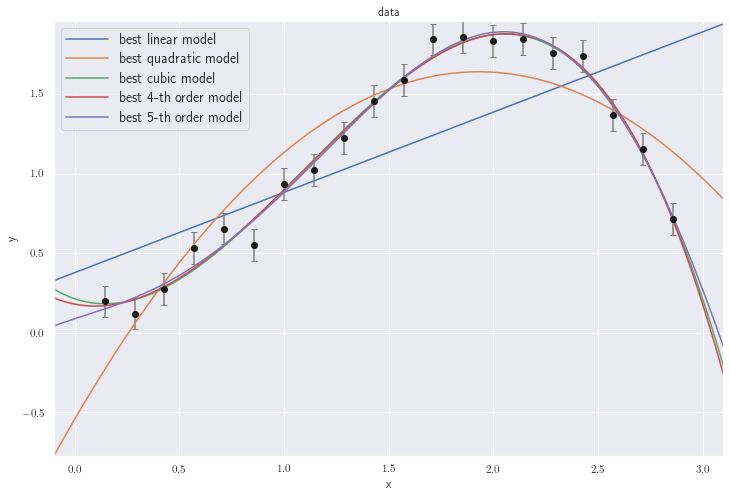

In [15]:
# numerical input parameters for this example
Ndata = 22  # the number of data points
NkTrue = 3  # for generating data
NkMax = 6   # fit polynomials up to this term

# generate (noisy) "data"
np.random.seed(0)
x = np.linspace(0, NkTrue, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y) 

# get best-fit parameters for linear, quadratic, cubic... models
theta = {}
for k in range(1, NkMax):
    theta[k] = best_theta(k, x, y, sigma_y)

# generate best fit lines on a fine grid 
xfit = np.linspace(-0.1, 3.1, 1000)
yfit = {}
for k in range(1, NkMax):
    yfit[k] = polynomial_fit(theta[k], xfit)

# plot 
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta[1], xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta[2], xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta[3], xfit), label='best cubic model')
ax.plot(xfit, polynomial_fit(theta[4], xfit), label='best 4-th order model')
ax.plot(xfit, polynomial_fit(theta[5], xfit), label='best 5-th order model')

ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

In [16]:
# compute chi2 per degree of freedom: sum{[(y-yfit)/sigma_y]^2} 
chi2 = {}
for k in range(1, NkMax):
    chi2[k] = np.sum(((y-polynomial_fit(theta[k], x))/sigma_y)**2) 
    
# the number of fitted parameters is (k+1)
BIC = {}
for k in range(1, NkMax):
    BIC[k] = chi2[k] + (k+1)*np.log(Ndata)

print ("         MODEL             CHI2          BIC")
print ('    best linear model:', chi2[1], BIC[1])
print (' best quadratic model:', chi2[2], BIC[2])
print ('     best cubic model:', chi2[3], BIC[3])
print ('best 4-th order model:', chi2[4], BIC[4])
print ('best 5-th order model:', chi2[5], BIC[5])
print ("")
print ("Therefore, the cubic model is the winner!")

         MODEL             CHI2          BIC
    best linear model: 349.65913513675673 355.84122004347336
 best quadratic model: 99.33135251840581 108.60447987848076
     best cubic model: 10.182096497819613 22.54626631125288
best 4-th order model: 10.090493156273212 25.545705423064792
best 5-th order model: 9.753601457780237 28.29985617793013

Therefore, the cubic model is the winner!


### HOWEVER, not by much - we cannot really strongly reject the 4-th order model...

## Example 4: a dataset with 4 Gaussian components 


**Gaussian mixture model** is a relatively simple and straightfoward numerical method on obtaining data likelihood function, and expectation maximization algorithm for maximizing the likelihood.  

The likelihood of a datum $x_i$ for a Gaussian mixture model is given by  

$$p(x_i|\theta) = \sum_{j=1}^{M} \alpha_{j}\mathcal{N}(\mu_j, \sigma_j)$$  

where vector of parameters $\theta$ includes Gaussian arameters $\mu_j$ and $\sigma_j$, 
and $\alpha_j$, the normalization factor for each Gaussian. There are (3M-1) model
parameteres (not 3M because of the constraint $\sum_{j=1}^{M} \alpha_{j} = 1$).
Given $N$ data points $x_i$, i=1..N, how do we choose $M$?

  
Let us introduce another metric for comparing models. Both **Akaike information criterion (AIC)** and **Bayesian information criterion (BIC)** are scoring systems for model comparisons in classical statistics dealing with models with different numbers of free parameters.  

Specifically, **AIC** is computed as

$$AIC \equiv -2 ln(L^0(M)) + 2k + \frac{2k(k+1)}{N-k-1}$$  

As we showed earlier, **BIC** is computed as

$$BIC \equiv -2ln[L^0(M)] + k lnN$$  
  
In this notebook, we are going to apply Gaussian mixture model on a dataset generated using 4 Gaussians. Then we will use AIC and BIC for model comparisons, and finally plot the best scored model in BIC.  

In [17]:
### Modeled after astroML book figure 4.2  
from sklearn.mixture import GaussianMixture as GMM
setup_text_plots(fontsize=18, usetex=True)

def doGMM(Ndata, noiseStd=0.00000001):
    #------------------------------------------------------------
    # Set up the dataset by drawing samples from Gaussians.
    #  We'll use scikit-learn's Gaussian Mixture Model to sample
    #  data from a mixture of 1-D Gaussians.  The usual way of using
    #  this involves fitting the mixture to data: we'll see that
    #  below.  Here we'll set the internal means, covariances,
    #  and weights by-hand and then generate a sample of requested 
    #  size Ndata. 
    N1 = int(0.2*Ndata)
    N2 = int(0.3*Ndata)
    N3 = int(0.2*Ndata)
    N4 = Ndata - (N1+N2+N3)
    random_state = np.random.RandomState(seed=1)
    X = np.concatenate([random_state.normal(-4, 1.1, N1),
                    random_state.normal(-1, 1.0, N2),
                    random_state.normal(0.9, 0.7, N3),
                    random_state.normal(3, 1.0, N4)]).reshape(-1, 1)
    X = np.random.normal(X, noiseStd)

    #------------------------------------------------------------
    # Learn (train) the best-fit GMM models
    # Here we'll use GMM in the standard way: the fit() method
    # uses an Expectation-Maximization approach to find the best
    # mixture of Gaussians for the data

    # fit models with 1-10 components
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]
    for i in range(len(N)):
        models[i] = GMM(N[i]).fit(X)
    # compute the BIC for each model
    BIC = [m.bic(X) for m in models]

    #------------------------------------------------------------
    # Plot the results
    #  We'll use two panels:
    #   1) data + best-fit mixture
    #   2) BIC vs number of components 

    fig = plt.figure(figsize=(12, 7))
    fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


    # plot 1: data + best-fit mixture
    ax = fig.add_subplot(121)
    M_best = models[np.argmin(BIC)]

    x = np.linspace(-10, 10, 1000)
    logprob = M_best.score_samples(x.reshape(-1, 1))
    responsibilities = M_best.predict_proba(x.reshape(-1, 1))

    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    ax.hist(X, 'auto', density=True, histtype='stepfilled', alpha=0.4)
    ax.plot(x, pdf, '-k')
    ax.plot(x, pdf_individual, '--k')
    ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')

    # plot 2: BIC
    ax = fig.add_subplot(122)
    ax.plot(N, BIC, '--k')
    ax.set_xlabel('n. components')
    ax.set_ylabel('BIC')

    ibest = np.argmin(BIC)
    print(BIC[ibest-1]-BIC[ibest], BIC[ibest], BIC[ibest+1]-BIC[ibest])
    plt.show()

989.0337532594567 471777.8839657044 537.2973039324279


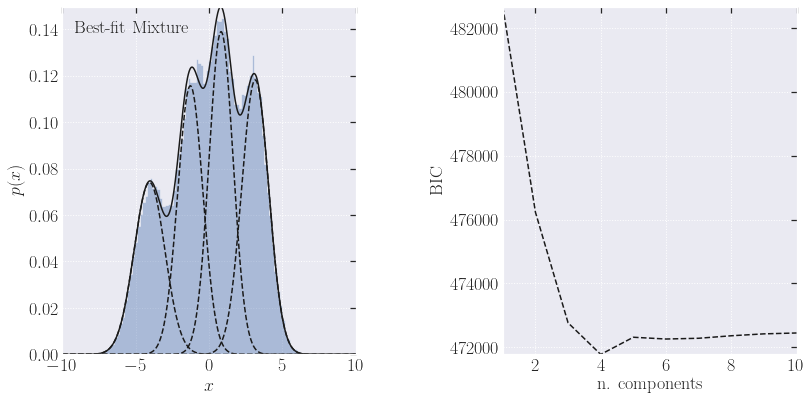

CPU times: user 5.74 s, sys: 3.98 s, total: 9.71 s
Wall time: 2.9 s


In [18]:
# let's see what we have, using a huge number of data points
%time doGMM(100000)    

Recall that $|\Delta BIC| = 5$ corresponds to “strong” evidence and $|\Delta BIC| = 10$ to “decisive” evidence.

We can conclude that the figure shows **hugely decisive** evidence in favor of the 4-component model. That is,
you should **not** argue that there are 3 peaks, or 5 peaks, in the left panel! 

What if we had a **much smaller** sample?

4.709128309128346 1448.7300687416134 15.446749241411226


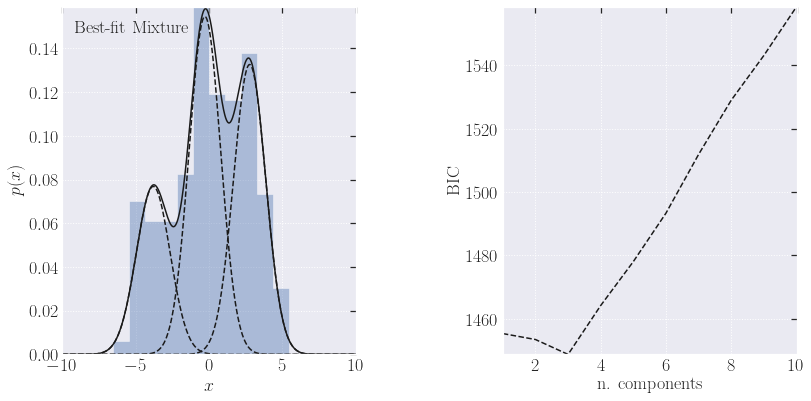

CPU times: user 751 ms, sys: 353 ms, total: 1.1 s
Wall time: 347 ms


In [19]:
# what if we have a much smaller sample?
%time doGMM(300)  

##  How do we interpret BIC? 

The figure above (right panel) shows that the 3-component model has a BIC lower
by about 15 than the 4-component model. This is sufficient evidence to
claim that the 3-component model is a much better choice than the 4-component model. 

Because the sample size is small, we did not "discover" the 4th component! 

Note also that the evidence in favor of 3 components, compared to 2-component 
and single-component models is not overwhelming! 

**“not worth more than a bare mention.”**

Altough we **did** draw that dataset from a model with 4 components, a sample of 300 values is insufficient to 
*discover* more than 3 components!

What if we increase the sample size? 

###  Conclusion: large sample size helps!  
### But one more thing: let's convolve our data with an arbitrary Gaussian to simulate measurement errors. 

97.4801228860124 25409.795376047605 29.156335621122707


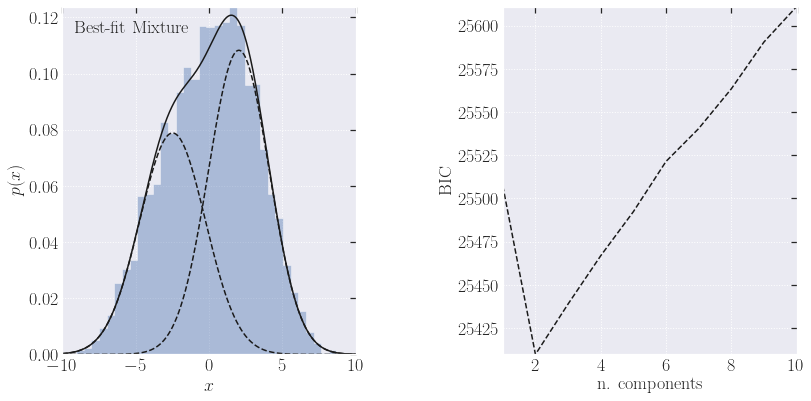

CPU times: user 1.23 s, sys: 598 ms, total: 1.83 s
Wall time: 529 ms


In [20]:
%time doGMM(5000,1.5)

## **Conclusion**
### If you badly "blur" your sample, of course you will not see the fine structure (i.e. many components)! 

### Therefore, even with large samples, you still need to have precise and well calibrated  measurements!  

# For overachievers... <a id='ABCandHB'></a> 

### What can we do when it's impossible to formulate likelihood function? 

[ABC: Approximate Bayesian Computation](https://github.com/astroML/astroML-workshop_AAS235/blob/master/approximate_bayesian_computation/AAS2019_ABCexample.ipynb)


### Hierarchical Bayes Modeling

(a.k.a. multilevel models, Bayesian belief networks, or graphical models)

In hierarchical, or multilevel, Bayesian analysis a prior distribution depends on unknown variables, the hyperparameters, that describe the group (population) level probabilistic model.

Their priors, called hyperpriors, resemble the priors in simple (single-level) Bayesian models.

When there are many independent measurement sets that share same priors, they together constrain priors better than can any single measurement alone.

In statistics, this effect is known as borrowing strength and is related to the concept of shrinkage estimators.
 
 

[An example of Hierarchical Bayes Modeling](https://github.com/astroML/astroML-workshop_AAS235/blob/master/hierarchical_bayes/AAS2019_HBexample.ipynb)


[Go to top](#toc)